# Analysis of Factors Affecting World Happiness

## Data preprocessing

### Loading libraries

In [16]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from xgboost import XGBRegressor, plot_importance

### Loading the dataset

In [6]:

df = pd.read_csv("World-happiness-report-updated_2024.csv", encoding="latin1")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


### Checking missing data

In [7]:
df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)


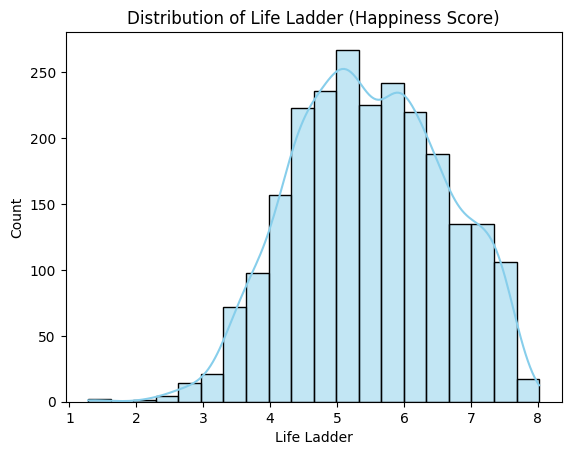

In [10]:
sns.histplot(df['Life Ladder'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Life Ladder (Happiness Score)")
plt.xlabel("Life Ladder")
plt.ylabel("Count")
plt.show()

* Most people report moderate happiness (around 5 out of 8).
* Very low happiness is rare, and high happiness is less common than average.

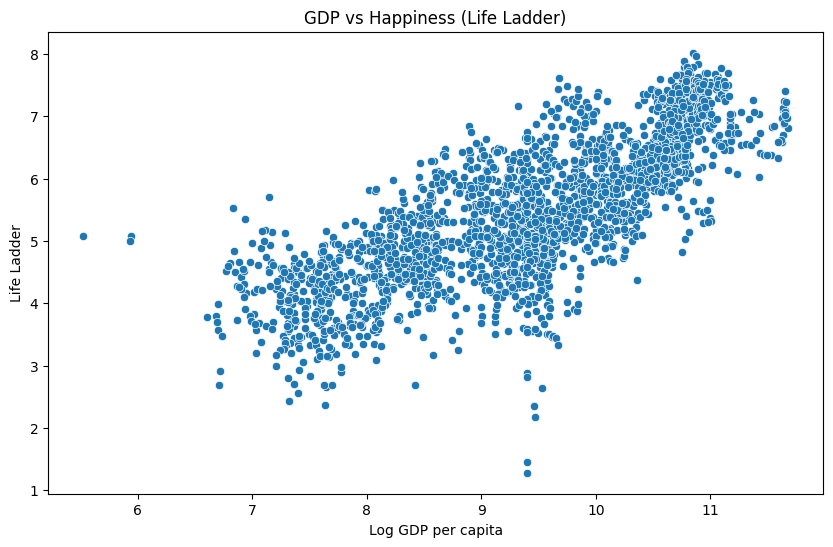

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log GDP per capita', y='Life Ladder', data=df)
plt.title("GDP vs Happiness (Life Ladder)")
plt.show()

> **National income has a positive correlation with happiness, but it is not the only factor.**

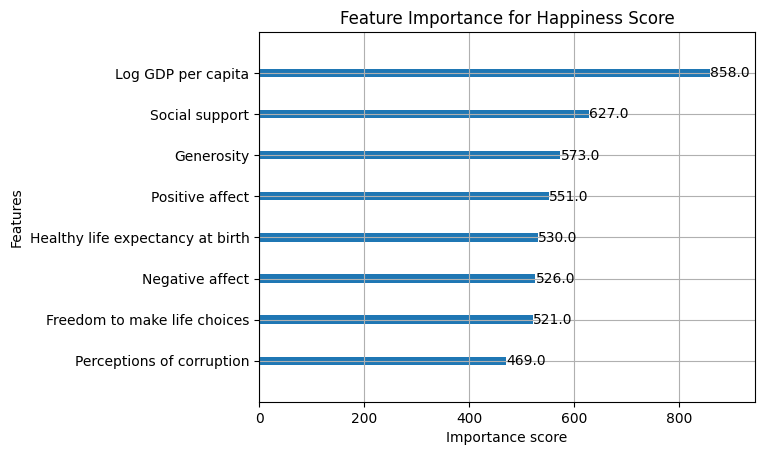

In [17]:
X = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
        'Positive affect', 'Negative affect']]
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

plot_importance(xgb_model)
plt.title("Feature Importance for Happiness Score")
plt.show()


* Income (GDP per capita) dominates happiness prediction, followed closely by social connections and emotional well-being.
* Freedom, health, and generosity matter — but perceived corruption has the weakest link.

* To boost national happiness, prioritize economic growth and strong social networks first.